In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('clickbait_data.csv')
data.head(10)

,headline,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1
5,How To Flirt With Queer Girls Without Making A...,1
6,32 Cute Things To Distract From Your Awkward T...,1
7,If Disney Princesses Were From Florida,1
8,What's A Quote Or Lyric That Best Describes Yo...,1
9,Natalie Dormer And Sam Claflin Play A Game To ...,1


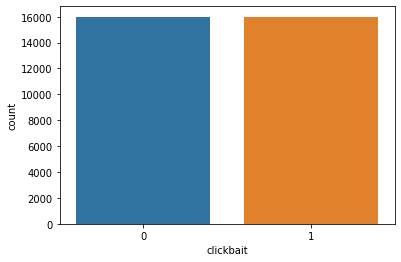

In [3]:
sns.countplot(data.clickbait)

In [4]:
from sklearn.base import BaseEstimator, TransformerMixin
import nltk
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [5]:
class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, lemmatizer=None, stopwords=None,token=True):
        self.token = token
        self.lemmatizer=lemmatizer
        self.stopwords=stopwords
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        if self.token:
            X=X.apply(lambda x: re.sub('\d+',"",x))
            X=X.apply(lambda x: re.sub('\W'," ",x))
            X=X.apply(lambda x: re.sub("  "," ",x))
            X=X.apply(lambda x: x.lower())
            self.lemmatizer=WordNetLemmatizer()
            self.stopwords=nltk.corpus.stopwords.words('english')
            X=X.apply(lambda x: " ".join([self.lemmatizer.lemmatize(word, self._get_wordnet_pos(word)) 
                          for word in x.split() if word not in self.stopwords]))
        return X
    def _get_wordnet_pos(self, word):
        tag=nltk.pos_tag([word])[0][1][0].upper()
        tag_dict={'J':wordnet.ADJ,
                  'N':wordnet.NOUN,
                  'V':wordnet.VERB,
                  'R':wordnet.ADV
                 }
        return tag_dict.get(tag,wordnet.NOUN)

In [6]:
X=data.headline
y=data.clickbait

In [7]:
tp=TextPreprocessor()

In [8]:
#data_1= tp.transform(X,y)

In [9]:
#data_1.head(10)

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

tf=TfidfVectorizer()
model=MultinomialNB()
pipeline=make_pipeline(tp,tf,model)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=10)

In [12]:
print(X_train.shape)
print(X_test.shape)

(25600,)
(6400,)


In [13]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('textpreprocessor',
                 TextPreprocessor(lemmatizer=<WordNetLemmatizer>,
                                  stopwords=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                  token=True)),
                (...
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_d

In [14]:
y_predict = pipeline.predict(X_test)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_predict))
print("\n")
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      3209
           1       0.95      0.96      0.96      3191

    accuracy                           0.96      6400
   macro avg       0.96      0.96      0.96      6400
weighted avg       0.96      0.96      0.96      6400



[[3040  169]
 [ 112 3079]]


In [17]:
pipeline.predict(pd.Series(data="Forget Snacks, Binge On These 11 Fat-Burning Cardio Exercises To Cut The Calories"))[0]

1

In [10]:
import time
import numpy as np
t1=time.perf_counter()
a=np.sqrt(256128902341412124)
t2=time.perf_counter()
print(t2-t1)

0.00022110000003294772
